В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. Вспомните инструкцию из урока 11 «Когортный анализ. Представление результатов» в теме 2 «Установка и настройка базы данных и клиента базы данных».. Пример кода для подключения к базе и выгрузки результатов вы найдёте и в этой тетрадке. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [1]:
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine 

pd.options.display.float_format = '{:,.2f}'.format

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

<details>

<summary>Подсказка</summary>
Используйте функцию для усечения даты, а затем сгруппируйте и отсортируйте данные.
</details>

In [6]:
# напишите запрос
query_1 = '''
SELECT DATE_TRUNC('month', creation_date)::date AS month_date,
       SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE EXTRACT(YEAR FROM creation_date) = '2008'
GROUP BY month_date
ORDER BY total_views DESC;
'''

# выполните запрос
sample_df_1 = pd.read_sql_query(query_1, con=engine)

In [7]:
# вывод результатов
sample_df_1

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

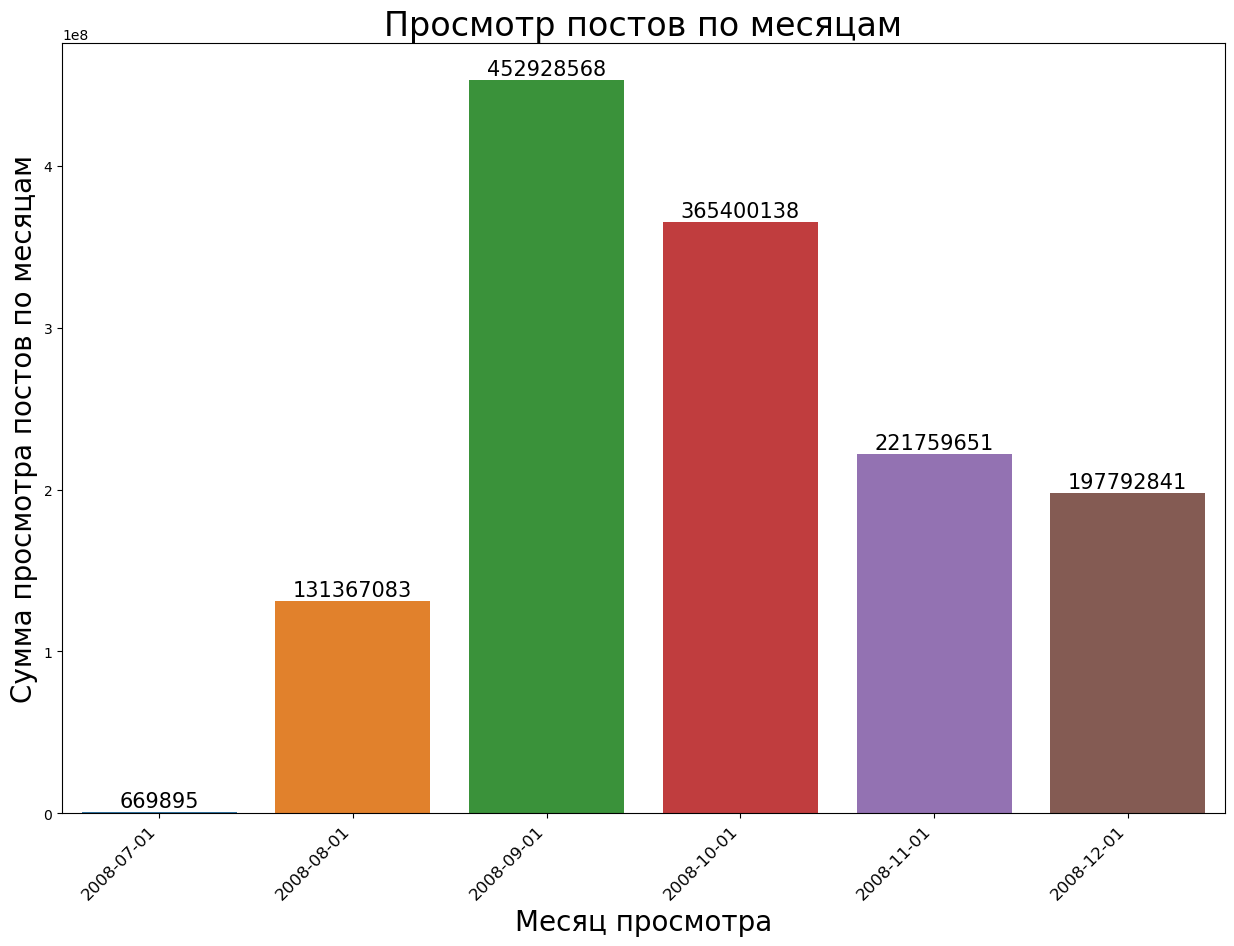

In [8]:
sample_df_1 = sample_df_1.sort_values('month_date')

        
fig = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=sample_df_1['month_date'], y=sample_df_1['total_views'])
ax.set_xticklabels(
    labels=sample_df_1['month_date'], rotation=45, ha='right', fontsize=12)

#ax.bar_label(ax.containers[0], labels=sample_df_1['total_views'].apply(
#    '{:.0f}'.format), fontsize=12)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

ax.set_title("Просмотр постов по месяцам", fontsize=24)
ax.set_xlabel("Месяц просмотра", fontsize=20)
ax.set_ylabel("Сумма просмотра постов по месяцам", fontsize=20)
plt.show()

**Ответ**

Нсколько я понимаю stackoverflow стартовал в июле 2008, хотя по википедии написан август..

Поначалу шел есттественный рост.

С октября пошёл спад.

Причины могут быть разные: растет база ответов, неудобный интерфейс, технические проблемы..

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

<details>

<summary>Подсказка</summary>
Вам нужно присоединить несколько таблиц — изучите внимательнее описание базы. Чтобы добавить промежуток времени к дате, используйте ключевое слово INTERVAL, например, так: <дата> + INTERVAL '1 year 2 months 3 days'
.</details>

In [9]:
# напишите запрос
query_2 = '''
SELECT u.display_name,
       COUNT(DISTINCT u.id)
FROM stackoverflow.users AS u
JOIN stackoverflow.posts AS p ON p.user_id = u.id
JOIN stackoverflow.post_types AS pt ON pt.id = p.post_type_id
WHERE p.creation_date::date BETWEEN u.creation_date::date AND u.creation_date::date + INTERVAL '1 month' 
      AND pt.type = 'Answer'
GROUP BY u.display_name
HAVING COUNT(DISTINCT p.id) > 100
ORDER by u.display_name;
'''
# выполните запрос
sample_df_2 = pd.read_sql_query(query_2, con=engine)

In [10]:
# вывод результатов
sample_df_2

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


Какие аномалии наблюдаются в данных? О чём они говорят?

**Ответ** 

Значения больше единицы могут говорить о том, что в результате группировки по имени могут быть значения count разные, так активность мы смотрим конкретно по имени, а не по имени и его когнретному id.

In [11]:
sample_df_2['count'].unique()

array([ 1,  8, 15, 29, 10, 21, 12,  7,  9, 16,  5, 11, 17,  3, 19])

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые зарегистрировались в сентябре 2008 года и оставили хотя бы один пост в декабре. Затем используйте результат для среза и посчитайте посты по месяцам.</details>

In [12]:
# напишите запрос
query_3 = '''
WITH tab AS
     (SELECT DISTINCT u.id
      FROM stackoverflow.users AS u                
      JOIN stackoverflow.posts AS p ON p.user_id = u.id
      WHERE u.creation_date::date BETWEEN '2008-09-01' AND '2008-09-30' 
        AND p.creation_date::date BETWEEN '2008-12-01' AND '2008-12-31')
SELECT CAST(DATE_TRUNC('month', p.creation_date) AS date) AS month, 
       COUNT(DISTINCT p.id) AS count
FROM stackoverflow.posts AS p 
WHERE p.user_id IN (SELECT * FROM tab)
  AND p.creation_date::date BETWEEN '2008-01-01' AND '2008-12-31'
GROUP BY month
ORDER BY month DESC;
'''
# выполните запрос
sample_df_3 = pd.read_sql_query(query_3, con=engine)

In [13]:
# вывод результатов
sample_df_3

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

In [14]:
# тестовый запрос на проверку августа, которого не должно быть
query_test = '''
WITH tab AS
     (SELECT DISTINCT u.id
      FROM stackoverflow.users AS u                
      JOIN stackoverflow.posts AS p ON p.user_id = u.id
      WHERE u.creation_date::date BETWEEN '2008-09-01' AND '2008-09-30' 
        AND p.creation_date::date BETWEEN '2008-12-01' AND '2008-12-31')
SELECT p.user_id, 
       u.creation_date AS user_creation,
       p.creation_date AS post_creation,
       CAST(DATE_TRUNC('month', p.creation_date) AS date) AS month
FROM stackoverflow.posts AS p
JOIN stackoverflow.users AS u ON p.user_id = u.id
WHERE p.user_id IN (SELECT * FROM tab)
  AND p.creation_date::date BETWEEN '2008-08-01' AND '2008-08-31'
GROUP BY p.user_id, u.creation_date, p.creation_date, month
ORDER BY month DESC;
'''

sample_df_test = pd.read_sql_query(query_test, con=engine)

In [15]:
# вывод результатов
sample_df_test

,user_id,user_creation,post_creation,month
0,4381,2008-09-03 10:48:17,2008-08-30 15:20:15,2008-08-01
1,4381,2008-09-03 10:48:17,2008-08-30 15:27:35,2008-08-01
2,31505,2008-09-01 00:00:00,2008-08-12 13:15:47,2008-08-01
3,31505,2008-09-01 00:00:00,2008-08-12 14:16:42,2008-08-01
4,31505,2008-09-01 00:00:00,2008-08-12 14:39:20,2008-08-01
5,31505,2008-09-01 00:00:00,2008-08-12 16:32:25,2008-08-01
6,31505,2008-09-01 00:00:00,2008-08-12 17:00:35,2008-08-01
7,31505,2008-09-01 00:00:00,2008-08-13 14:03:39,2008-08-01
8,31505,2008-09-01 00:00:00,2008-08-13 21:10:42,2008-08-01
9,31505,2008-09-01 00:00:00,2008-08-14 10:28:43,2008-08-01


**Ответ**

Аномалия тут одна: присутствует август месяц, а его не должно быть..
Тут скорее всего техническая ошибка при фиксации времени создания поста в в БД: 
- по user_id: 4381 - возможно он писал на месяц позже, а время по БД сдвинулось на месяц;
- по user_id: 31505 - тут явно кто-то изменил дату регистрации.

Ну и по началу видимо в БД отсутсвовала проверка разницы во времени...

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

<details>

<summary>Подсказка</summary>
Для подсчёта суммы с накоплением используйте оконную функцию.
</details>

In [16]:
# напишите запрос
query_4 = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
ORDER BY user_id;
'''
# выполните запрос
sample_df_4 = pd.read_sql_query(query_4, con=engine)

In [17]:
# вывод результатов
sample_df_4

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые написали более 120 постов за август. Используя этот запрос в качестве подзапроса для среза, найдите и сохраните во временную таблицу идентификаторы нужных пользователей, дни августа и количество постов в день. В основном запросе сгруппируйте данные по пользователям и найдите для каждого из них среднее количество постов.
</details>

In [18]:
# напишите запрос
query_5 = '''
WITH usr AS
        (SELECT user_id
         FROM stackoverflow.posts
         WHERE creation_date::date BETWEEN '2008-08-01' AND '2008-08-31'
         GROUP BY user_id
         HAVING COUNT(id) > 120),
     tab AS
        (SELECT user_id,
                DATE_TRUNC('day', creation_date)::date AS day,
                COUNT(id)
         FROM stackoverflow.posts
         WHERE user_id IN (SELECT * FROM usr)
         GROUP BY user_id, DATE_TRUNC('day', creation_date)::date)
SELECT t.user_id,
       AVG(t.count) AS count
FROM tab AS t
WHERE t.day BETWEEN '2008-08-01' AND '2008-08-31'
GROUP BY t.user_id
ORDER BY count;
'''
# выполните запрос
sample_df_5 = pd.read_sql_query(query_5, con=engine)

In [19]:
# вывод результатов
sample_df_5

,user_id,count
0,116,4.78
1,234,5.21
2,91,5.68
3,905,7.00
4,383,7.28


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

<details>

<summary>Подсказка</summary>
Посчитайте, сколько активных дней было у каждого пользователя. Добавьте данные во временную таблицу и используйте в основном запросе.
</details>

In [20]:
# напишите запрос
query_6 = '''
WITH res AS 
       (SELECT user_id,
               COUNT(DISTINCT creation_date::date) AS count_post
        FROM stackoverflow.posts
        WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07' 
        GROUP BY user_id)
SELECT AVG(count_post)::int AS result
FROM res;
'''
# выполните запрос
sample_df_6 = pd.read_sql_query(query_6, con=engine)

In [21]:
# вывод результатов
sample_df_6

,result
0,2


Проанализируйте итоговую таблицу — какие выводы можно сделать?

**Ответ**

В течение недели с 1 по 7 декабря 2008 года среднее время нахождения на платформе: 2 дня.

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

<details>

<summary>Подсказка</summary>
Преобразовать результат оконной функции в нужное значение вам поможет аналог условного оператора в SQL: CASE <поле> WHEN <старое значение> THEN <новое значение> END.
</details>

In [22]:
# напишите запрос
query_7 = '''
WITH lags AS
         (SELECT user_id,
                 creation_date, 
                 LAG(creation_date, 2, NULL) OVER(PARTITION BY user_id ORDER BY creation_date)::date
          FROM stackoverflow.posts)
SELECT user_id,
       creation_date,
       CASE
           WHEN EXTRACT(MONTH FROM lag) = 1 THEN 'January'
           WHEN EXTRACT(MONTH FROM lag) = 2 THEN 'February'
           WHEN EXTRACT(MONTH FROM lag) = 3 THEN 'March'
           WHEN EXTRACT(MONTH FROM lag) = 4 THEN 'April'
           WHEN EXTRACT(MONTH FROM lag) = 5 THEN 'May'
           WHEN EXTRACT(MONTH FROM lag) = 6 THEN 'June'
           WHEN EXTRACT(MONTH FROM lag) = 7 THEN 'July'
           WHEN EXTRACT(MONTH FROM lag) = 8 THEN 'August'
           WHEN EXTRACT(MONTH FROM lag) = 9 THEN 'September'
           WHEN EXTRACT(MONTH FROM lag) = 10 THEN 'October'
           WHEN EXTRACT(MONTH FROM lag) = 11 THEN 'November'
           WHEN EXTRACT(MONTH FROM lag) = 12 THEN 'December'
       END AS second_last_month   
FROM lags;
'''
# выполните запрос
sample_df_7 = pd.read_sql_query(query_7, con=engine)

In [23]:
sample_df_7

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

<details>

<summary>Подсказка</summary>
Вспомните, как выглядел запрос для расчёта Retention Rate в теории. Создайте две временные таблицы: `profile` и `sessions` (в ней будет информация о публикациях), а затем используйте их в основном запросе.

Во временной таблице `profile` вам понадобятся три поля:

- идентификатор пользователя;
- дата первого поста пользователя, усечённая до месяца (признак начала когорты);
- количество пользователей этой когорты.
</details>

In [24]:
# напишите запрос
query_8 = '''
WITH cohort AS
           (SELECT DISTINCT user_id,
            FIRST_VALUE(DATE_TRUNC('month', creation_date)) 
                       OVER (PARTITION BY user_id ORDER BY DATE_TRUNC('month', creation_date)) AS cohort_dt
            FROM stackoverflow.posts),
      users AS
           (SELECT *,
                   COUNT(user_id) OVER(PARTITION BY cohort_dt) AS cohort_users_cnt
            FROM cohort),
     session AS 
           (SELECT user_id,
                   DATE_TRUNC('month', creation_date) AS session_date
                   FROM stackoverflow.posts
                   GROUP BY user_id, session_date)
SELECT u.cohort_dt,
       s.session_date,
       COUNT(u.user_id) AS users_cnt,
       u.cohort_users_cnt,
       ROUND(COUNT(u.user_id) * 100.00 / u.cohort_users_cnt, 2) AS retention_rate
FROM users AS u 
JOIN session AS s ON u.user_id=s.user_id
GROUP BY u.cohort_dt, s.session_date, u.cohort_users_cnt;

'''
# выполните запрос
sample_df_8 = pd.read_sql_query(query_8, con=engine)

In [25]:
# вывод результатов
sample_df_8

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

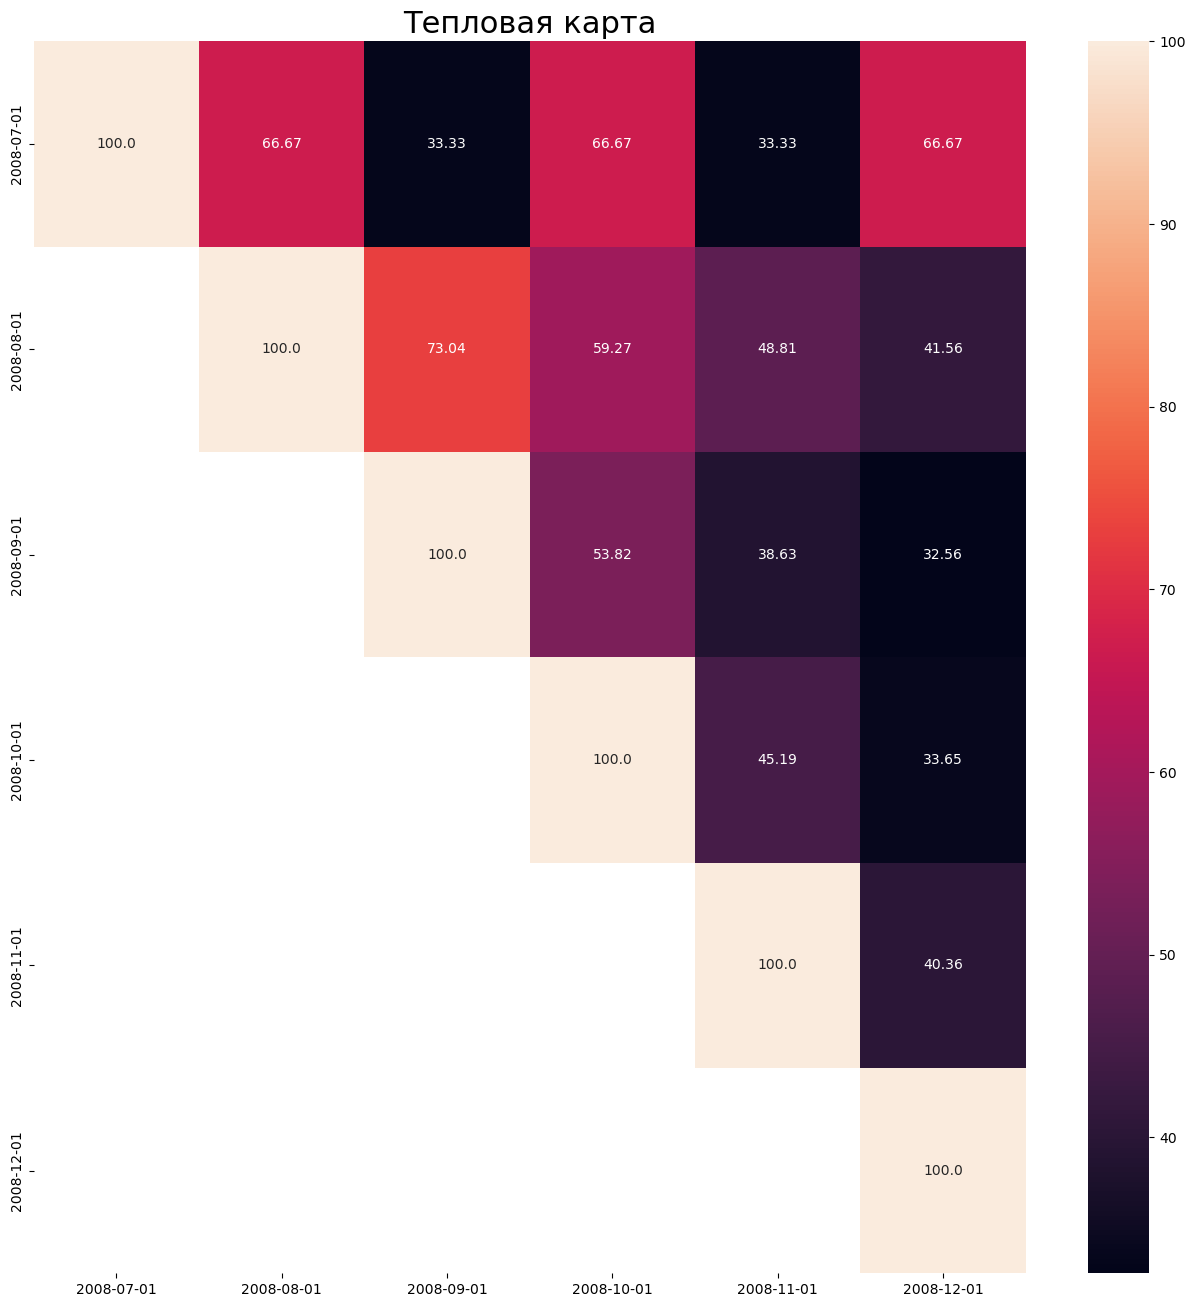

In [26]:
# постройте тепловую карту Retention Rate
retention = sample_df_8.pivot(index='cohort_dt', columns='session_date', values='retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(16, 16)) # задаём размер графика
sns.heatmap(retention, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Тепловая карта', fontsize=22) # название графика
plt.show()

**Ответ**

Первая когорта самая маленькая - это видимо тестировщики..

А далее по все когортам процент удержания снижается.

Тут возможны варианты:
- постепенное заполнение базы 'Вопрос-Ответ', и соответтсвенно уже не нужно больше задавать вопросы.
- система рейтингов отпугивающая пользователя: нужно набирать рейтинг, чтобы писать комменты в чужих темах и т.д. и т.п.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

<details>

<summary>Подсказка</summary>
Эту задачу стоит декомпозировать. Сформируйте запрос, который отобразит номер месяца и количество постов. Затем можно использовать оконную функцию, которая вернёт значение за предыдущий месяц, и посчитать процент.
</details>

In [27]:
# напишите запрос
query_9 = '''
WITH mnt AS 
         (SELECT EXTRACT(MONTH from creation_date::date)::int AS creation_month,
                 COUNT(DISTINCT id) AS posts_count   
          FROM stackoverflow.posts
          WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
          GROUP BY creation_month)
SELECT *,
       ROUND((posts_count::numeric / LAG(posts_count) OVER() -1) * 100 , 2) AS percentage
FROM mnt;
'''
# выполните запрос
sample_df_9 = pd.read_sql_query(query_9, con=engine)

In [28]:
# вывод результатов
sample_df_9

,creation_month,posts_count,percentage
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

In [29]:
# Создаем словать для перекодировки месяцев в текстовое значение
labels_dict = { 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# Возвращаем месяцам текстовое значение
sample_df_9['creation_month'] = sample_df_9['creation_month'].map(labels_dict)

In [30]:
# Список значений posts_count для диаграммы
pie_list = sample_df_9['posts_count']

# Список месяцев для диаграммы
labels_list = sample_df_9['creation_month'].tolist()

# Генерация значений отрыва кусков диаграммы в зависимости от количества значений
explode = tuple(random.choices([0.0, 0.1], k=len(pie_list)))

# Цвета
colors = ("orange", "cyan", "brown", "yellow")

# Окантовка кусков диаграммы
wp = {'linewidth': 2, 'edgecolor': "black"}

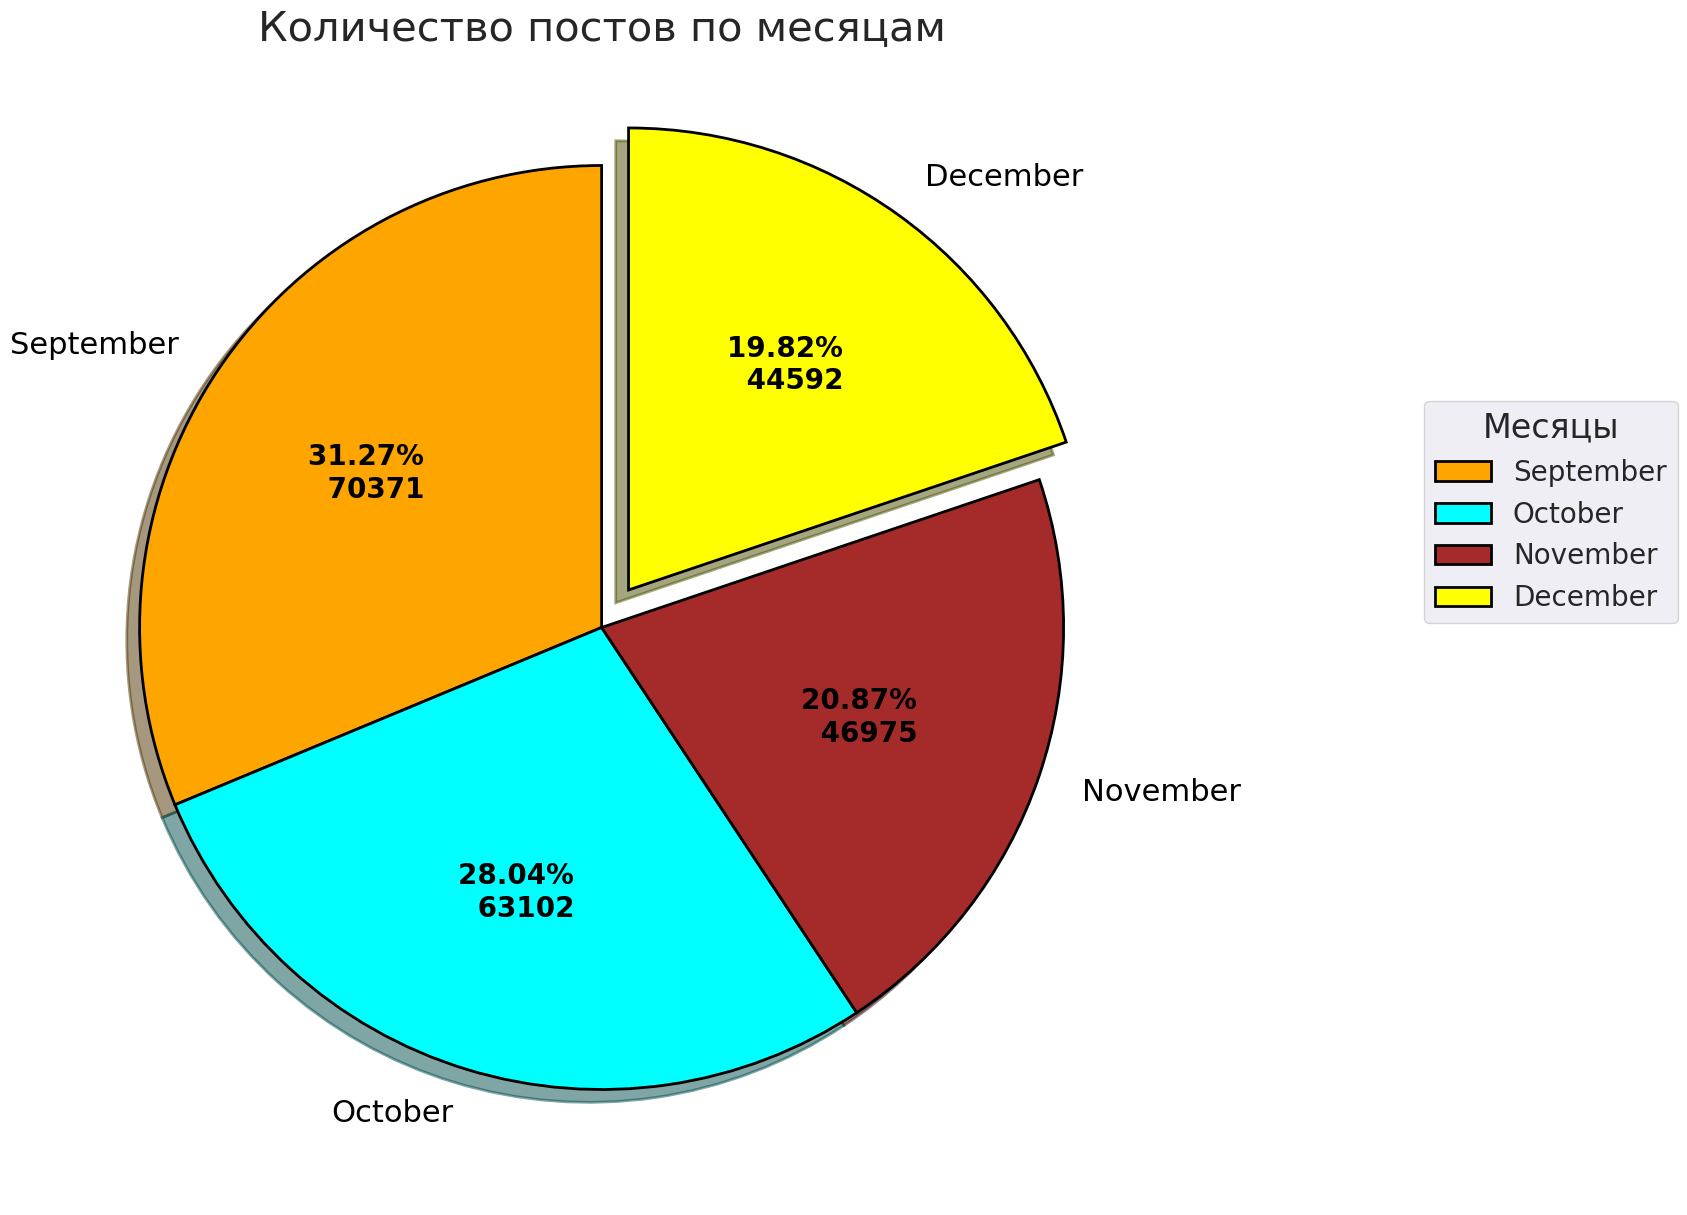

In [31]:
sns.set (font_scale=2)

fig, ax = plt.subplots(figsize=(20, 15))

wedges, texts, autotexts = ax.pie(pie_list,
                                  autopct=lambda p : '{:.2f}% \n {:.0f}'.format(p,p * sum(pie_list)/100),
                                  explode=explode,
                                  labels=labels_list,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black"))


ax.legend(wedges,
          labels_list,
          title="Месяцы",
          loc="center left",
          fontsize=20,
          bbox_to_anchor=(1.2, 0, 0, 1.2))

plt.setp(autotexts, size=20, weight="bold")

ax.set_title("Количество постов по месяцам", fontsize=30)

plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

<details>

<summary>Подсказка</summary>
Декомпозируйте задачу:
1) Найдите пользователя, который опубликовал больше всего постов. 2) Найдите дату и время создания каждого поста этого пользователя и номер недели. 
3) Отобразите данные только о последних постах пользователя. Для этого можно использовать оконную функцию.
</details>

In [32]:
# напишите запрос
query_10 = '''
WITH usr AS
         (SELECT user_id,
                 COUNT(DISTINCT id) AS count
          FROM stackoverflow.posts
          GROUP BY user_id
          ORDER BY count DESC
          LIMIT 1),
      week AS
         (SELECT p.user_id,
                 p.creation_date,
                 EXTRACT('week' from p.creation_date)::int AS week_number
          FROM stackoverflow.posts AS p
          JOIN usr ON usr.user_id = p.user_id 
          WHERE p.creation_date::date BETWEEN '2008-10-01' AND '2008-10-31')
SELECT DISTINCT week_number::int AS week_creation,
       MAX(creation_date) OVER (PARTITION BY week_number) AS creation_date
FROM week
ORDER BY week_creation;
'''
# выполните запрос
sample_df_10 = pd.read_sql_query(query_10, con=engine)

In [33]:
# вывод результатов
sample_df_10

,week_creation,creation_date
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01
